In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [89]:
Data = pd.read_csv(r'D:\Data Science\Intellipaat\Capstone Project\Reviews.csv')
Data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


## Understanding the Data

In [90]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [91]:
Data.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [92]:
Data.dropna(inplace=True)

In [93]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [94]:
Data['Summary'].head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [95]:
Data['Text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [96]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re

## Text Preprocessing

#### Convert to lower case

In [97]:
Data['Text'] = Data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#### Punctuation Removal

In [98]:
Data['Text'] = Data['Text'].str.replace('[^\w\s]',' ')

In [99]:
Data['Text'].head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price  there was a wide...
Name: Text, dtype: object

#### Stopword Removal

In [100]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
stopword = stopwords.words('english')
Data['Text'] = Data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

In [102]:
Data['Text']

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanuts p...
2         confection around centuries light pillowy citr...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chicken good better resturants ea...
568450    disappointed flavor chocolate notes especially...
568451    stars small give 10 15 one training session tr...
568452    best treats training rewarding dog good groomi...
568453    satisfied product advertised use cereal raw vi...
Name: Text, Length: 568411, dtype: object

## Dataset Visualization

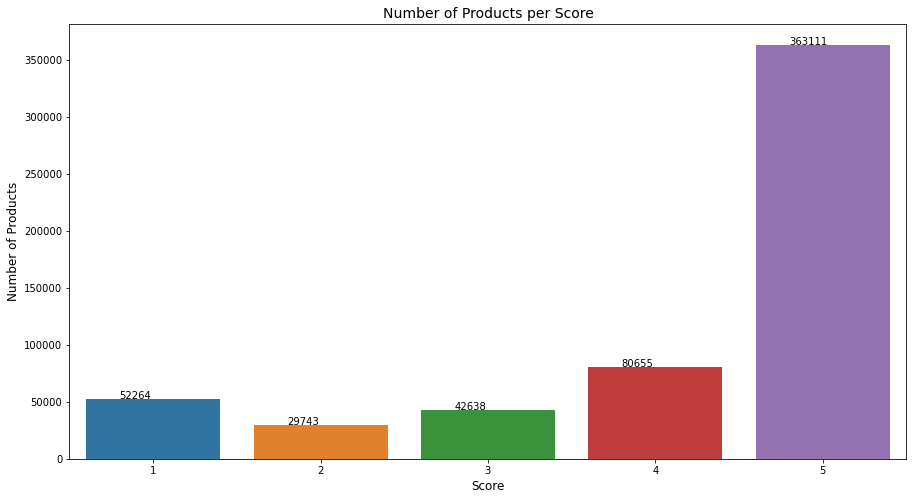

In [103]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = Data['Score'], data = Data)
plt.title('Number of Products per Score', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x()+0.2, i.get_height()+10))

plt.savefig('P3-Number of Products per Score.png')
plt.show()

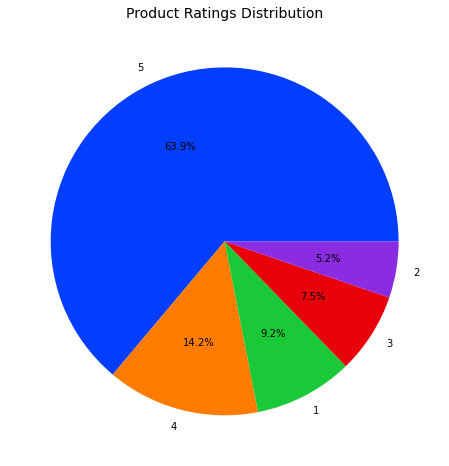

In [104]:
rating = Data['Score'].value_counts()
label = rating.index
quantity = rating.values

plt.figure(figsize=(15,8))
plt.pie(quantity, labels=label, colors=sns.color_palette('bright'), autopct='%.1f%%')
plt.title('Product Ratings Distribution', fontsize=14)
plt.savefig('P3-Product Ratings Distribution.png')
plt.show()

## Review Classification

In [107]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
pol_score = []
for row in Data['Text']:
    Score = analyzer.polarity_scores(row)
    pol_score.append(Score)

In [110]:
Senti_Data = pd.DataFrame(pol_score)
Senti_Data

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.171,0.544,0.285,0.8073
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468
...,...,...,...,...
568406,0.000,0.367,0.633,0.9300
568407,0.290,0.554,0.156,-0.6240
568408,0.000,0.805,0.195,0.8271
568409,0.062,0.283,0.654,0.9678


In [111]:
Data_Score = pd.concat([Data.reset_index(drop=True), Senti_Data], axis=1)
Data_Score

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts p...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,0.171,0.544,0.285,0.8073
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568406,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesame chicken good better resturants ea...,0.000,0.367,0.633,0.9300
568407,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,disappointed flavor chocolate notes especially...,0.290,0.554,0.156,-0.6240
568408,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,stars small give 10 15 one training session tr...,0.000,0.805,0.195,0.8271
568409,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,best treats training rewarding dog good groomi...,0.062,0.283,0.654,0.9678


In [112]:
Sentiment = []
for i in range(0,568411):
    if Data_Score['compound'][i] > 0.01:
        Sentiment.append('Positive')
    elif Data_Score['compound'][i] < 0:
        Sentiment.append('Negative')
    else:
        Sentiment.append('Neutral')

In [113]:
Data_Score['Sentiment'] = Sentiment
Data_Score

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts p...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,0.171,0.544,0.285,0.8073,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568406,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesame chicken good better resturants ea...,0.000,0.367,0.633,0.9300,Positive
568407,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,disappointed flavor chocolate notes especially...,0.290,0.554,0.156,-0.6240,Negative
568408,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,stars small give 10 15 one training session tr...,0.000,0.805,0.195,0.8271,Positive
568409,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,best treats training rewarding dog good groomi...,0.062,0.283,0.654,0.9678,Positive


## Evaluation

In [114]:
Eval_Data = Data_Score.copy()

In [115]:
Eval_Data= Eval_Data[['Score','Sentiment']]
Eval_Data

,Score,Sentiment
0,5,Positive
1,1,Negative
2,4,Positive
3,2,Positive
4,5,Positive
...,...,...
568406,5,Positive
568407,2,Negative
568408,5,Positive
568409,5,Positive


In [116]:
Eval_Data['Score'] = Eval_Data['Score'].map({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})
Eval_Data

,Score,Sentiment
0,Positive,Positive
1,Negative,Negative
2,Positive,Positive
3,Negative,Positive
4,Positive,Positive
...,...,...
568406,Positive,Positive
568407,Negative,Negative
568408,Positive,Positive
568409,Positive,Positive


In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
accuracy_score(Eval_Data['Score'], Eval_Data['Sentiment'])

0.7937777418100634

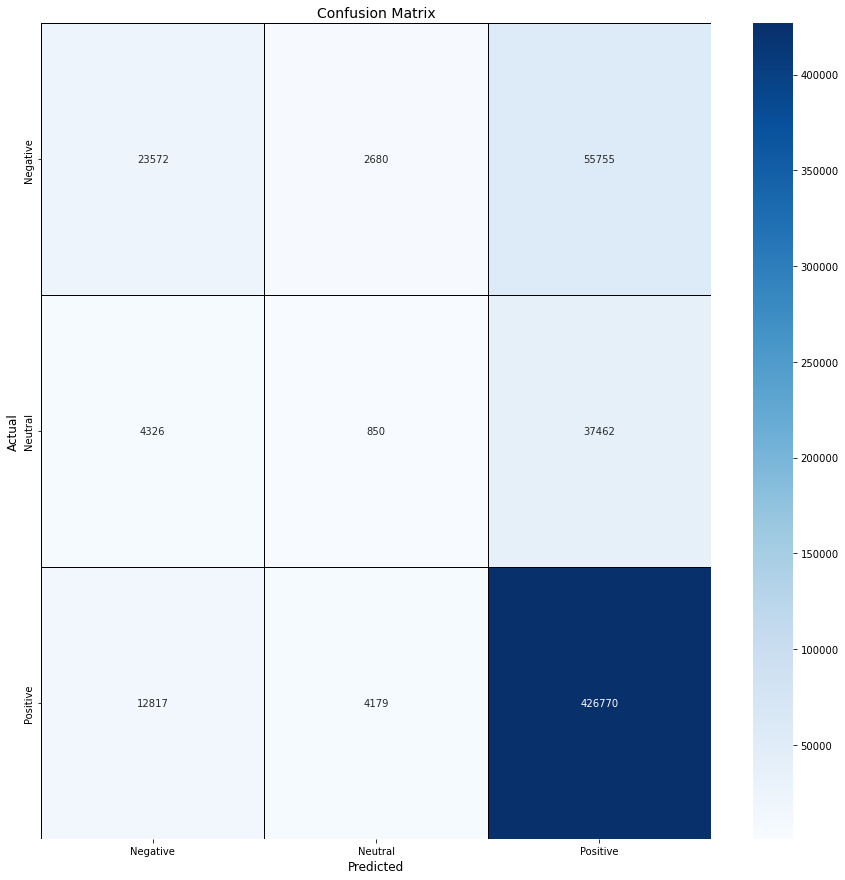

In [128]:
cm = confusion_matrix(Eval_Data['Score'], Eval_Data['Sentiment'])

plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, cmap='Blues', annot = True,
           linecolor = 'black', linewidth= 1, fmt='.0f')
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_yticklabels(['Negative','Neutral','Positive'])

plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.savefig('P3-Confusion Matrix.png')
plt.show()

In [120]:
print(classification_report(Eval_Data['Score'], Eval_Data['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.58      0.29      0.38     82007
     Neutral       0.11      0.02      0.03     42638
    Positive       0.82      0.96      0.89    443766

    accuracy                           0.79    568411
   macro avg       0.50      0.42      0.43    568411
weighted avg       0.73      0.79      0.75    568411

